## Deeplearning.Ai

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math, copy
import seaborn as sns

In [2]:
X = np.array([0,1,2,3,4,5,6,7,8,9,10])
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [3]:
Y = np.array([22,25,27,29,32,35,37,39,42,45,46])
Y

array([22, 25, 27, 29, 32, 35, 37, 39, 42, 45, 46])

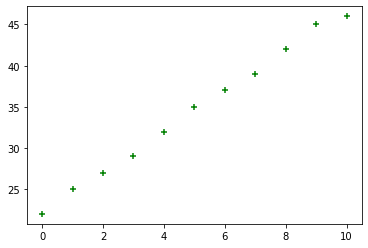

In [4]:
plt.scatter(X, Y, marker='+', c='g')

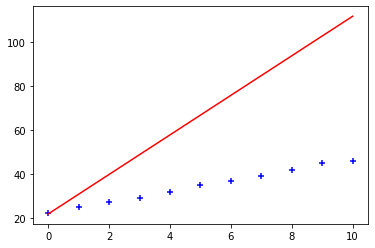

In [18]:
w = 9
b = 21.8
y_hat = w * X + b
plt.plot(X, y_hat, c = 'r', label='Our Prediction')
plt.scatter(X, Y, marker='+', c='b', label = 'Actual Values')
plt.show()

## Manual Cost Calculation with definec W and B

 $$ cost, J(w,b) = \frac{1}{2m} x^{(i)},y^{(i)}  $$ 
 $$ J(w,b) = \frac{1}{2m}\ \sum\limits_{i = 0}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2} $$


In [6]:
def cost_function(X, Y, w, b):

    cost = 0

    m = X.shape[0]

    for i in range(m):

        y_wb = w * X[i] + b

        cost_i = ( y_wb - Y[i] ) ** 2
        
        cost += cost_i

    return cost / ( 2 * m )

In [19]:
print("overall cost : "+ str(cost_function(X, Y, 9, 21.8)))

overall cost : 737.42


# to implement below function having knowledge in deravatives is not mandatory

In [8]:
def compute_gradient(X, Y, w, b):

    m = X.shape[0]  

    dj_dw = 0

    dj_db = 0

    for i in range(m):  

        f_wb = w * X[i] + b 

        dj_dw_i = (f_wb - Y[i]) * X[i] 

        dj_db_i = f_wb - Y[i] 

        dj_db += dj_db_i

        dj_dw += dj_dw_i 
        
    dj_dw = dj_dw / m 
    
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [9]:
dj_dw, dj_db = compute_gradient(X, Y, w, b)
print("dj_dw : ", dj_dw, "| dj_db", dj_db)

dj_dw :  -0.31818181818182917 | dj_db -0.15454545454545576


<a name="toc_40291_2.1"></a>
## Gradient descent 
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In [10]:
def gradient_descent(X, Y,  w_in, b_in, learning_rate, num_iters, compute_gradient, cost_function):

    w = copy.deepcopy(w_in) # avoid modifying global w_in

    cost_history = []
    param_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, Y, w, b)

        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

        if i<100000: 
            cost_history.append( cost_function(X, Y, w , b))
            param_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:

            print(  f" Iteration {i:4}: Cost {cost_history[-1]:0.2e} ",
                    f" dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                    f" w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, cost_history, param_history 





In [11]:
w_initial = 300
b_initial = 200
learning_rate = 0.01
num_iters = 10000
w_, b_, cost_history, param_history  = gradient_descent(X, Y,  w_initial, w_initial, learning_rate, num_iters, compute_gradient, cost_function)


 Iteration    0: Cost 8.31e+05   dj_dw:  1.180e+04, dj_db:  1.766e+03    w:  1.820e+02, b: 2.82345e+02
 Iteration 1000: Cost 2.77e+01   dj_dw: -5.624e-01, dj_db:  3.905e+00    w:  4.513e-01, b: 3.60924e+01
 Iteration 2000: Cost 1.92e-01   dj_dw: -3.408e-02, dj_db:  2.367e-01    w:  2.333e+00, b: 2.30248e+01
 Iteration 3000: Cost 9.13e-02   dj_dw: -2.065e-03, dj_db:  1.434e-02    w:  2.447e+00, b: 2.22329e+01
 Iteration 4000: Cost 9.09e-02   dj_dw: -1.252e-04, dj_db:  8.691e-04    w:  2.454e+00, b: 2.21849e+01
 Iteration 5000: Cost 9.09e-02   dj_dw: -7.584e-06, dj_db:  5.266e-05    w:  2.455e+00, b: 2.21820e+01
 Iteration 6000: Cost 9.09e-02   dj_dw: -4.596e-07, dj_db:  3.191e-06    w:  2.455e+00, b: 2.21818e+01
 Iteration 7000: Cost 9.09e-02   dj_dw: -2.785e-08, dj_db:  1.934e-07    w:  2.455e+00, b: 2.21818e+01
 Iteration 8000: Cost 9.09e-02   dj_dw: -1.688e-09, dj_db:  1.172e-08    w:  2.455e+00, b: 2.21818e+01
 Iteration 9000: Cost 9.09e-02   dj_dw: -1.023e-10, dj_db:  7.102e-10    

Text(0, 0.5, 'cost')

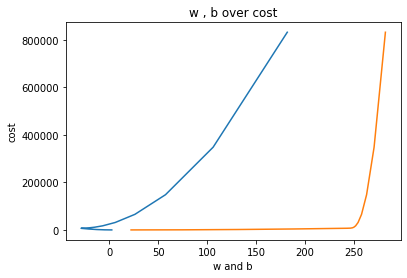

In [12]:
plt.plot(param_history, cost_history)
plt.title("w , b over cost")
plt.xlabel("w and b")
plt.ylabel("cost")

# Cost change over Iteration

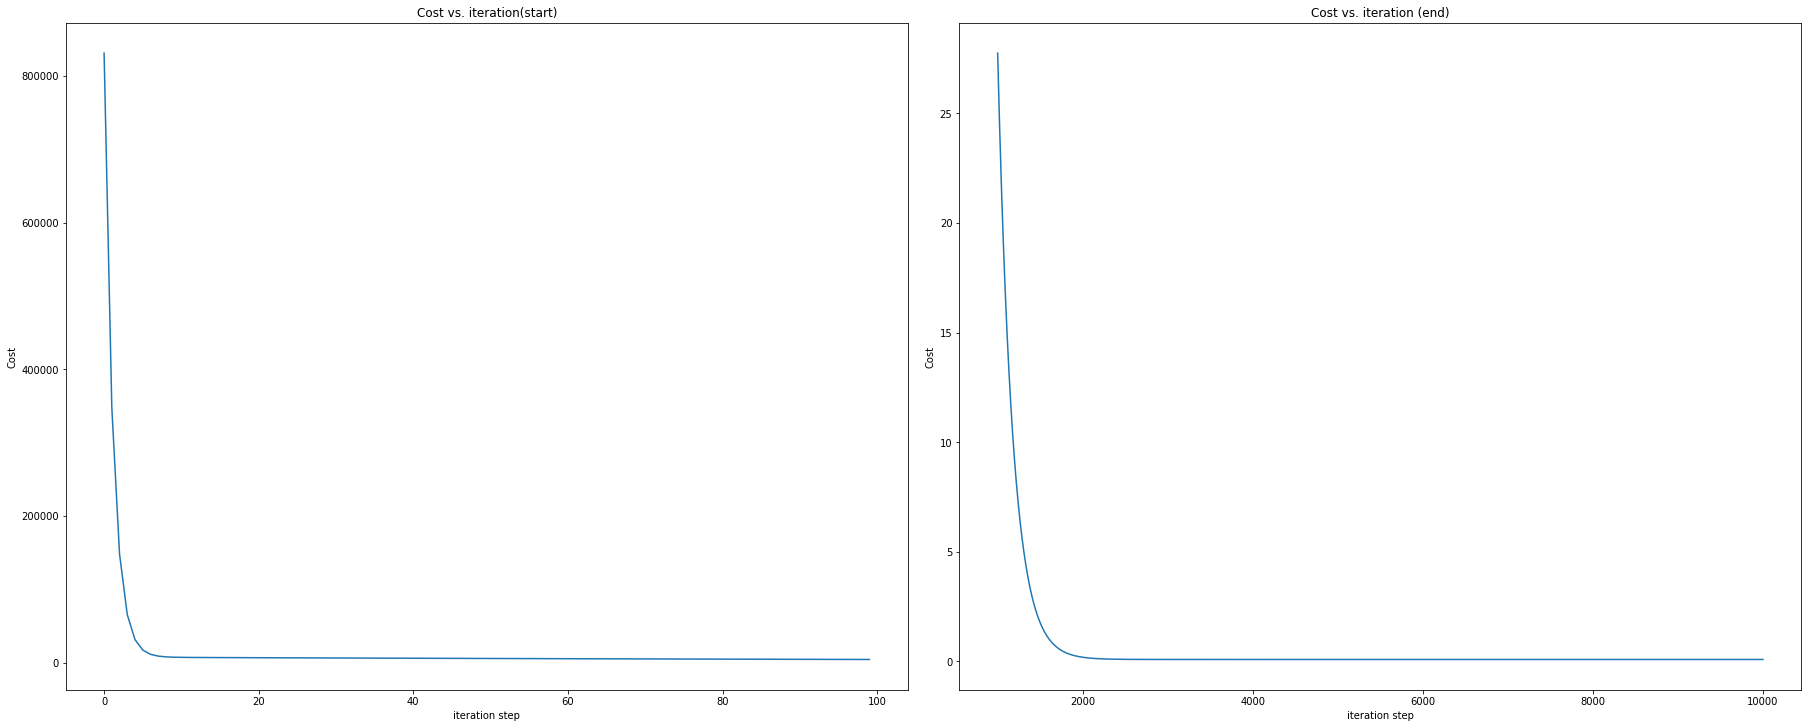

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(25,10))
ax1.plot(cost_history[:100])
ax2.plot(1000 + np.arange(len(cost_history[1000:])), cost_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [14]:
print(" Final parameters\t W\t\t B\n","Value\t\t\t",w,"\t\t",b)

 Final parameters	 W		 B
 Value			 2.5 		 21.8


# final plot
    - based on best parameters

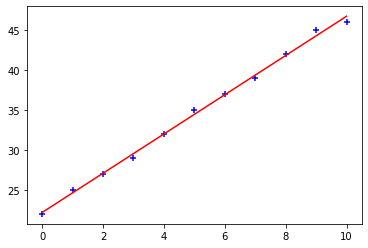

In [15]:
y_hat_f = w_ * X + b_
plt.plot(X, y_hat_f, c = 'r', label='Our Prediction')
plt.scatter(X, Y, marker='+', c='b', label = 'Actual Values')
plt.show()

# prediction Accuracy

In [16]:
def cal_accuracy(y,y_hat):
    f_count = 0
    t_count = 0
    n = Y.shape[0]
    for i in range(n):
        if(y[i]==y_hat[i]):
            t_count += 1
        else:
            f_count +=1
    return (t_count/n) * 100

In [17]:
accuracy = cal_accuracy(Y,y_hat_f)
print(f"Accuracy = {accuracy} %")

Accuracy = 0.0 %
